In [1]:
import requests
import  os
import glob as glob
import datetime as dt
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [69]:
os.chdir("C:/Users/gameon/Documents/Ustacky Assignment/Capstone Project/")

### A - NCDC Website Scrap

In [60]:
Covid = pd.read_html('https://covid19.ncdc.gov.ng/', header=0)[0]

### B - John Hopkins Data Repository

In [71]:
Confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [72]:
Deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

In [73]:
Recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [74]:
Global_Data = pd.concat([Confirmed, Deaths, Recovered], keys=['Confirmed', 'Deaths', 'Recovered'])

### C - External Data

In [75]:
Budget = pd.read_csv('Budget data.csv')

In [76]:
GDP = pd.read_csv('RealGDP.csv')

In [77]:
External = pd.read_csv('covid_external.csv')

In [78]:
Covid_Outdated = pd.read_csv('covidnig.csv')

In [79]:
External['states'] = External['states'].replace({'Akwa Ibom' : 'Akwa-Ibom', 'Cross river' : 'Cross River', 'Nassarawa' : 'Nasarawa'})

In [80]:
Nigeria_Data = pd.merge(Budget, External, on='states', how='inner')

### Task 2 - Viewing the Data

In [81]:
Nigeria_Data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Abia,136.60,102.70,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
1,Adamawa,183.30,139.31,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
2,Akwa-Ibom,597.73,366.00,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01
3,Anambra,137.10,112.80,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08
4,Bauchi,167.20,128.00,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85


In [82]:
NewNigeria = pd.concat([Nigeria_Data, GDP], axis=1)

In [83]:
NewNigeria.head(10)

,states,Initial_budget (Bn),Revised_budget (Bn),region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Year,Q1,Q2,Q3,Q4
0,Abia,136.60,102.70,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14,2014.0,15438679.50,16084622.31,17479127.58,18150356.45
1,Adamawa,183.30,139.31,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,2015.0,16050601.38,16463341.91,17976234.59,18533752.07
2,Akwa-Ibom,597.73,366.00,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01,2016.0,15943714.54,16218542.41,17555441.69,18213537.29
3,Anambra,137.10,112.80,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08,2017.0,15797965.83,16334719.27,17760228.17,18598067.07
4,Bauchi,167.20,128.00,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,2018.0,16096654.19,16580508.07,18081342.10,19041437.59
5,Bayelsa,242.18,183.15,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00,2019.0,16434552.65,16931434.89,18494114.17,19530000.00
6,Benue,189.00,119.00,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,2020.0,16740000.00,15890000.00,17820000.00,0.00
7,Borno,146.80,108.80,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,NaN,NaN,NaN,NaN,NaN
8,Cross River,1100.00,147.10,South South,4272000,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98,NaN,NaN,NaN,NaN,NaN
9,Delta,395.50,282.30,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,NaN,NaN,NaN,NaN,NaN


In [84]:
NewNigeria.info

<bound method DataFrame.info of          states  Initial_budget (Bn)  Revised_budget (Bn)         region  \
0          Abia               136.60               102.70     South East   
1       Adamawa               183.30               139.31     North East   
2     Akwa-Ibom               597.73               366.00     South East   
3       Anambra               137.10               112.80     South East   
4        Bauchi               167.20               128.00     North East   
5       Bayelsa               242.18               183.15    South South   
6         Benue               189.00               119.00  North Central   
7         Borno               146.80               108.80     North East   
8   Cross River              1100.00               147.10    South South   
9         Delta               395.50               282.30    South South   
10       Ebonyi               178.40               131.80    South South   
11          Edo               179.20               128.8

In [85]:
Covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,65609,6615,58529,465
1,FCT,20063,151,19742,170
2,Kaduna,9194,37,9091,66
3,Plateau,9119,54,9008,57
4,Rivers,7919,364,7453,102


### Task 3 - Cleaning the Data

###### TODO A

In [86]:
#Replacing the commas in the Numbers
#Renaming Columns
Covid.replace(',', '', regex=True, inplace=True)
Covid = Covid.rename(columns = {'States Affected' : 'states', 'No. of Cases (Lab Confirmed)' : 'Confirmed', 'No. of Cases (on admission)' : 'Cases', 'No. Discharged' : 'Discharged', 'No. of Deaths' : 'Deaths'})

In [87]:
#Changing to appropriate Datatype
cols = ['Confirmed', 'Cases', 'Discharged', 'Deaths']
Covid[cols] = Covid[cols].apply(pd.to_numeric, errors='coerce')
Covid.head()

,states,Confirmed,Cases,Discharged,Deaths
0,Lagos,65609,6615,58529,465
1,FCT,20063,151,19742,170
2,Kaduna,9194,37,9091,66
3,Plateau,9119,54,9008,57
4,Rivers,7919,364,7453,102


In [88]:
Covid.dtypes

states        object
Confirmed      int64
Cases          int64
Discharged     int64
Deaths         int64
dtype: object

In [89]:
Covid.head()

,states,Confirmed,Cases,Discharged,Deaths
0,Lagos,65609,6615,58529,465
1,FCT,20063,151,19742,170
2,Kaduna,9194,37,9091,66
3,Plateau,9119,54,9008,57
4,Rivers,7919,364,7453,102


In [90]:
#Extracting Nigeria's Data from the Global Data
NigGlobal = Global_Data[Global_Data['Country/Region'] == 'Nigeria'].transpose()
NigGlobal.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)
NigGlobal.reset_index(inplace=True)

In [91]:
#Changing Datatype
NigGlobal['Dates'] = pd.to_datetime(NigGlobal['index'])
cols = ['Confirmed', 'Deaths', 'Recovered']
NigGlobal[cols] = NigGlobal[cols].apply(pd.to_numeric)

In [92]:
#Resolving Multilevel index
NigGlobal.columns = NigGlobal.columns.droplevel(1)

In [93]:
NigGlobal.set_index('Dates', inplace=True)
del NigGlobal['index']

In [94]:
NigGlobal.head()

,Confirmed,Deaths,Recovered
Dates,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0


In [95]:
NigGlobal.columns

Index(['Confirmed', 'Deaths', 'Recovered'], dtype='object')

###### TODO B

In [96]:
#Dataframe for Confirmed Cases
NigCon = NigGlobal['Confirmed']
NigCon.head()

Dates
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Confirmed, dtype: int64

#### TODO C

In [97]:
#Dataframe for Death Cases
NigDie = NigGlobal['Deaths'].transpose()
NigDie.head()

Dates
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Deaths, dtype: int64

#### TODO D

In [98]:
#Dataframe for Recovered Cases
NigRec = NigGlobal['Recovered'].transpose()
NigRec.head()

Dates
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Recovered, dtype: int64

### Analysis

In [99]:
Covid.head()

,states,Confirmed,Cases,Discharged,Deaths
0,Lagos,65609,6615,58529,465
1,FCT,20063,151,19742,170
2,Kaduna,9194,37,9091,66
3,Plateau,9119,54,9008,57
4,Rivers,7919,364,7453,102


In [100]:
Covid.dtypes

states        object
Confirmed      int64
Cases          int64
Discharged     int64
Deaths         int64
dtype: object

###### TODO A

Text(0.5, 1.0, 'Top Ten Confirmed Laboratory Cases')

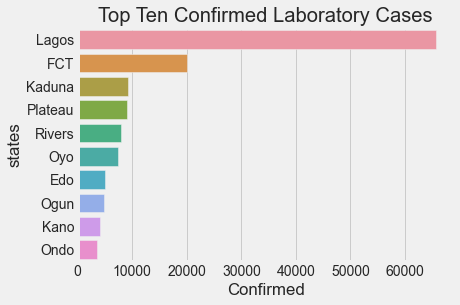

In [101]:
sns.barplot(y= 'states', x = 'Confirmed', data=Covid.nlargest(10, 'Confirmed')).set_title('Top Ten Confirmed Laboratory Cases')

###### TODO B

Text(0.5, 1.0, 'Top Ten Discharged Cases')

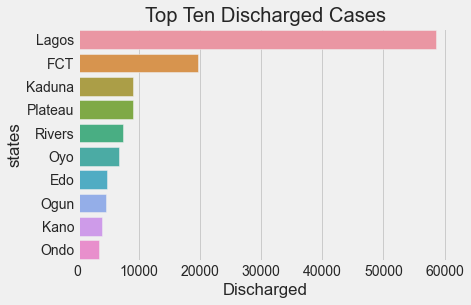

In [102]:
sns.barplot(y= 'states', x = 'Discharged', data=Covid.nlargest(10, 'Discharged')).set_title('Top Ten Discharged Cases')

###### TODO D

Text(0.5, 1.0, 'Top Ten Death Cases')

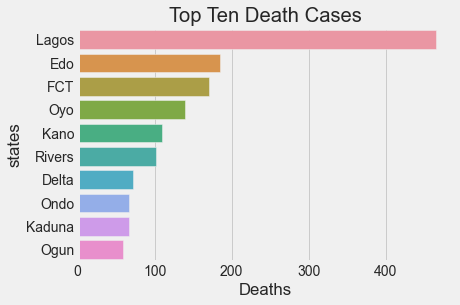

In [103]:
sns.barplot(y= 'states', x = 'Deaths', data=Covid.nlargest(10, 'Deaths')).set_title('Top Ten Death Cases')

In [104]:
NigGlobal.dtypes

Confirmed    int64
Deaths       int64
Recovered    int64
dtype: object

###### TODO E

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911.]),
 <a list of 9 Text major ticklabel objects>)

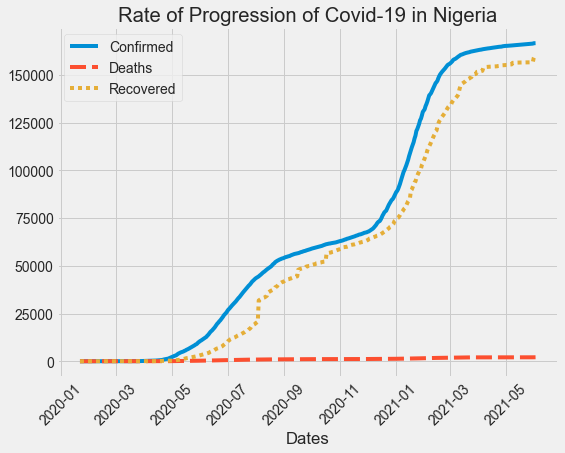

In [105]:
plt.figure(figsize=(8,6))
Goal = sns.lineplot(data=NigGlobal).set_title('Rate of Progression of Covid-19 in Nigeria')
plt.xticks(rotation=45)

###### TODO F

In [106]:
New = NigGlobal.diff()

In [107]:
New

,Confirmed,Deaths,Recovered
Dates,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0
...,...,...,...
2021-05-29,31.0,0.0,11.0
2021-05-30,30.0,0.0,1.0
2021-05-31,203.0,28.0,2223.0


(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911.]),
 <a list of 9 Text major ticklabel objects>)

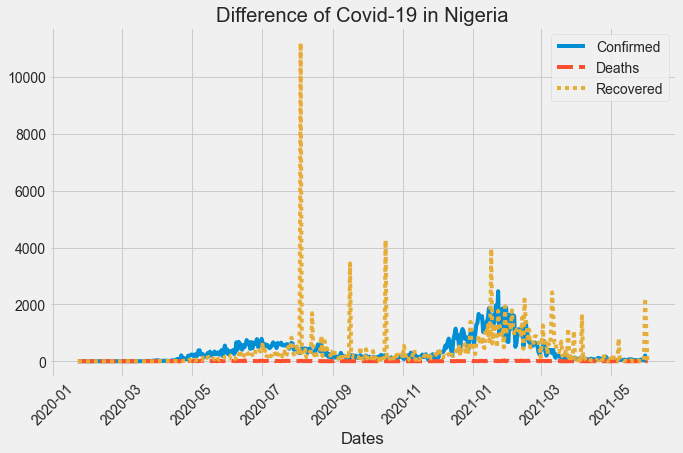

In [108]:
plt.figure(figsize=(10,6))
Goal2 = sns.lineplot(data=New).set_title('Difference of Covid-19 in Nigeria')
plt.xticks(rotation=45)

###### TODO G

In [109]:
New.loc[New['Confirmed'].idxmax()]

Confirmed    2464.0
Deaths         12.0
Recovered    1771.0
Name: 2021-01-23 00:00:00, dtype: float64

#####  Date of maximum infection rate is 23rd of January, 2021.


###### TODO H

In [110]:
#Merging the External and NCDC Dataset
Compare = pd.merge(External, Covid, on='states', how='inner')

In [111]:
Compare.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Confirmed,Cases,Discharged,Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,20063,151,19742,170
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9119,54,9008,57
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,3264,141,3068,55
3,Nasarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85,2403,19,2345,39
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,961,27,914,20


In [112]:
Compared = Compare.nlargest(10, 'Confirmed')

In [113]:
Compared.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Confirmed,Cases,Discharged,Deaths
30,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,65609,6615,58529,465
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,20063,151,19742,170
14,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,9194,37,9091,66
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9119,54,9008,57
25,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,7919,364,7453,102


Text(0.5, 1.0, 'Relationship between Volatility and Confirmed Cases')

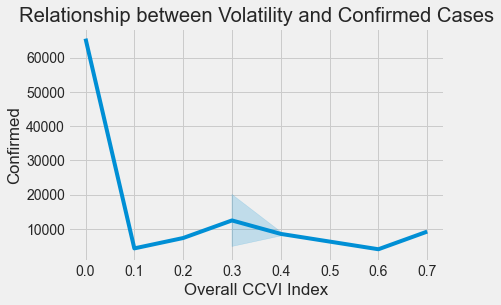

In [114]:
sns.lineplot(x='Overall CCVI Index', y='Confirmed', data=Compared).set_title('Relationship between Volatility and Confirmed Cases')

###### TODO I

Text(0.5, 1.0, 'Relationship between the Population density and Infection')

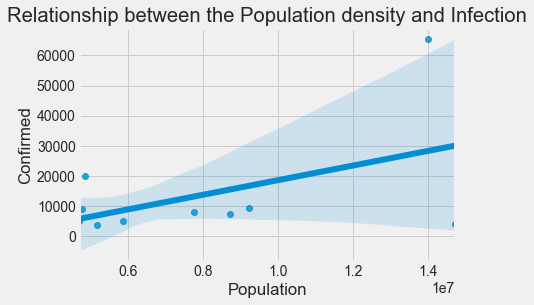

In [115]:
sns.regplot(x='Population', y='Confirmed', data=Compared).set_title('Relationship between the Population density and Infection')

###### TODO J

In [116]:
#Provide more analyses on TODO G & H - More relationships
New.loc[New['Deaths'].idxmax()]

Confirmed    490.0
Deaths        31.0
Recovered    274.0
Name: 2020-06-16 00:00:00, dtype: float64

In [117]:
New.loc[New['Recovered'].idxmax()]

Confirmed      304.0
Deaths          14.0
Recovered    11188.0
Name: 2020-08-04 00:00:00, dtype: float64

###### Dates of Maximum Deaths and Recovery are 16th June and 4th August respectively.

In [118]:
Compared1 = Compare.nlargest(10, 'Deaths')
Compared1

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Confirmed,Cases,Discharged,Deaths
30,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,65609,6615,58529,465
24,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,4962,22,4755,185
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,20063,151,19742,170
31,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,7315,364,6812,139
13,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87,4031,23,3898,110
25,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,7919,364,7453,102
26,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,2691,63,2556,72
33,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04,3607,85,3455,67
14,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,9194,37,9091,66
32,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,4844,111,4674,59


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

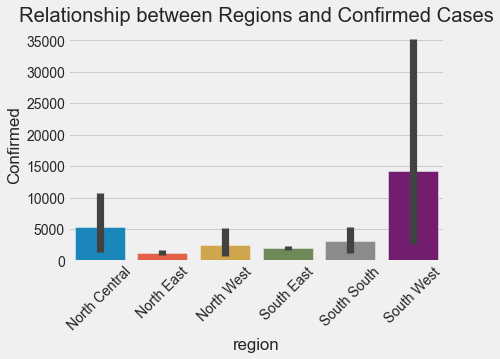

In [119]:
sns.barplot(x='region', y='Confirmed', data=Compare).set_title('Relationship between Regions and Confirmed Cases')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

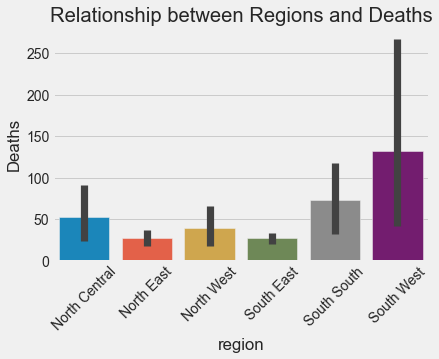

In [120]:
sns.barplot(x='region', y='Deaths', data=Compare).set_title('Relationship between Regions and Deaths')
plt.xticks(rotation=45)

###### From the above charts, North East appears to have been affected least while the South East appears to have the least death cases with the South West maintaining high rates in both situations.

Text(0.5, 1.0, 'Relationship between Age and Confirmed Cases')

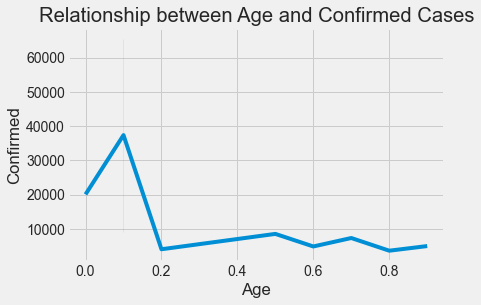

In [121]:
sns.lineplot(x='Age', y='Confirmed', data=Compared).set_title('Relationship between Age and Confirmed Cases')

###### TODO L

In [122]:
GDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [123]:
GDP_Melt = pd.melt(GDP, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'])
GDP_Melt.head()

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [124]:
GDP_Melt

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


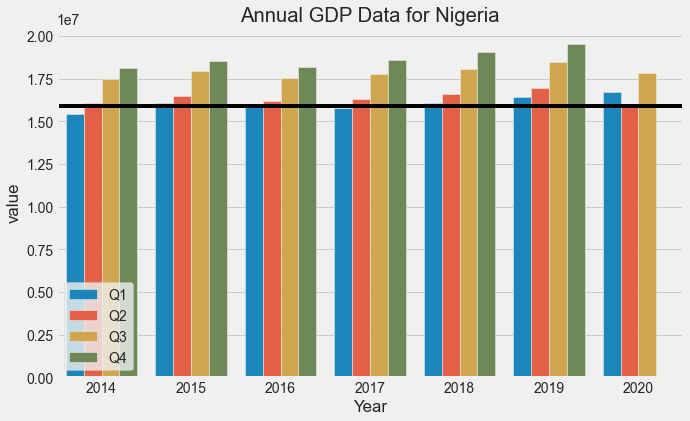

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Year', y='value', hue= 'variable', data=GDP_Melt).set_title('Annual GDP Data for Nigeria')
plt.axhline(y=15890000.00, color='black')
plt.legend(loc='lower left')